In [12]:
pip install webdriver-manager

In [13]:
pip install selectorlib

Note: you may need to restart the kernel to use updated packages.


### 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars. 

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [85]:
#import needed libraries
from selenium import webdriver
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

from selenium.common.exceptions import NoSuchElementException

In [17]:
#open empty web driver
driver=webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
driver.get('https://www.amazon.in/')

In [18]:
#for job search bar
search_for_job_role=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search_for_job_role.send_keys(input("Enter the Product:-"))

Enter the Product:-guitar


In [23]:
#for clicking search button
search_button=driver.find_element_by_xpath('/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search_button.click()
time.sleep(5)
driver.implicitly_wait(5)

In [45]:
guitar_name=[]
try:
    guitar_tag=driver.find_elements_by_xpath('//span[@class="a-size-base-plus a-color-base a-text-normal"]')
except NoSuchElementException as e:
    print('Type of Error:',e) 
for x in guitar_tag:
    guitar_name.append(x.text)
time.sleep(4)

In [53]:
guitar_price=[]
try:
    guitar_tag=driver.find_elements_by_xpath('//span[@class="a-price-whole"]')
except NoSuchElementException as e:
    print('Type of Error:',e)
for x in guitar_tag:
    guitar_price.append(x.text)
time.sleep(5)
guitar_price.insert(25,'-')
time.sleep(5)
guitar_price.insert(51,'-')

In [55]:
guitar_delivery=[]
try:
    guitar_tag=driver.find_elements_by_xpath('//span[@class="a-color-secondary"]')
except NoSuchElementException as e:
    print('Type of Error:',e)
for x in guitar_tag:
    guitar_delivery.append(x.text)
time.sleep(5)
guitar_delivery.insert(20,'-')
time.sleep(5)
guitar_delivery.insert(25,'-')
time.sleep(5)
guitar_delivery.insert(51,'-')

In [63]:
next_page=driver.find_element_by_xpath('/html/body/div[1]/div[2]/div[1]/div[1]/div/span[3]/div[2]/div[64]/div/div/span/a[1]')
next_page.click()

In [65]:
guitar_tag=driver.find_elements_by_xpath('//span[@class="a-size-base-plus a-color-base a-text-normal"]')
for x in guitar_tag:
    guitar_name.append(x.text)
time.sleep(5)

In [67]:
guitar_tag=driver.find_elements_by_xpath('//span[@class="a-price-whole"]')
for x in guitar_tag:
    guitar_price.append(x.text)
time.sleep(5)
guitar_price.insert(93,'-')

In [69]:
guitar_tag=driver.find_elements_by_xpath('//span[@class="a-color-secondary"]')
for x in guitar_tag:
    guitar_delivery.append(x.text)
time.sleep(5)
guitar_delivery.insert(62,'-')
time.sleep(5)
guitar_delivery.insert(79,'-')
time.sleep(5)
guitar_delivery.insert(90,'-')
time.sleep(5)
guitar_delivery.insert(93,'-')
time.sleep(5)

#In this 117 index Item there are two dates so drop 1 date
guitar_delivery.pop(117)

'Thursday, June 2'

In [78]:
print(len(guitar_name),len(guitar_price),len(guitar_delivery))

120 120 120


In [79]:
#create dataframe
df=pd.DataFrame()
df['Guitar Name']=guitar_name
df['Guitar Price']=guitar_price
df['Guitar Delivery Date']=guitar_delivery

In [80]:
df

,Guitar Name,Guitar Price,Guitar Delivery Date
0,Medellin carbn fiber guitar 38inch (BROWN),"2,499","Monday, May 23"
1,Kadence Frontier guitar with Online Guitar lea...,"5,399","Tomorrow, May 22"
2,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,"7,348","Monday, May 23"
3,Vault Traveller 34 Inch Acoustic Guitar With B...,"3,799","Wednesday, May 25"
4,"Intern INT-38C Acoustic Guitar Kit, With Bag, ...","3,053","Tomorrow, May 22"
...,...,...,...
115,"Granada, Acoustic Guitar, Dreadnought PRLD-14C...","6,014","Tomorrow, May 22"
116,HOMME STORE 4 String Guitar Kids Brown Plastic...,899,"Friday, May 27"
117,Festra R-40- Trussrod Acoustic Guitar Kit with...,"4,080","Thursday, May 26"
118,SHARE BY Blueberry R-40- Trussrod Acoustic Gui...,"3,990","Thursday, May 26"


In [81]:
#save as CSV file
df.to_csv('guitar.csv')

In [82]:
driver.close()

### 3. Write a python program to access the search bar and search button on https://images.google.com/ and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [112]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException

### 1.Fruits

In [142]:
#Open Driver
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
#open driver with url
driver.get('https://images.google.com/')

In [145]:
#input bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys(input("Enter Name:-"))
#search bar
click_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
click_bar.click()

Enter Name:-fruits


In [146]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [149]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

In [150]:
totalResults

112

Message: element click intercepted: Element  is not clickable at point (176, 92). Other element would receive the click: 
  (Session info: chrome=101.0.4951.54)
Stacktrace:
Backtrace:
	Ordinal0 [0x004E7413+2389011]
	Ordinal0 [0x00479F61+1941345]
	Ordinal0 [0x0036C658+837208]
	Ordinal0 [0x0039F8AF+1046703]
	Ordinal0 [0x0039D8D6+1038550]
	Ordinal0 [0x0039B5EB+1029611]
	Ordinal0 [0x0039A359+1024857]
	Ordinal0 [0x0038FF93+982931]
	Ordinal0 [0x003B414C+1130828]
	Ordinal0 [0x0038F974+981364]
	Ordinal0 [0x003B4364+1131364]
	Ordinal0 [0x003C4302+1196802]
	Ordinal0 [0x003B3F66+1130342]
	Ordinal0 [0x0038E546+976198]
	Ordinal0 [0x0038F456+980054]
	GetHandleVerifier [0x00699632+1727522]
	GetHandleVerifier [0x0074BA4D+2457661]
	GetHandleVerifier [0x0057EB81+569713]
	GetHandleVerifier [0x0057DD76+566118]
	Ordinal0 [0x00480B2B+1968939]
	Ordinal0 [0x00485988+1989000]
	Ordinal0 [0x00485A75+1989237]
	Ordinal0 [0x0048ECB1+2026673]
	BaseThreadInitThunk [0x76506359+25]
	RtlGetAppContainerNamedObjectPath [0
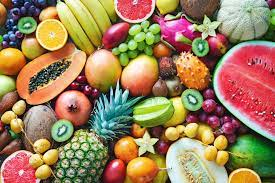
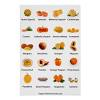
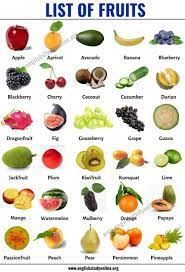
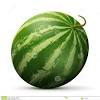
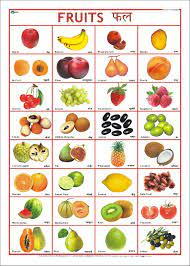

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=101.0.4951.54)
Stacktrace:
Backtrace:
	Ordinal0 [0x004E7413+2389011]
	Ordinal0 [0x00479F61+1941345]
	Ordinal0 [0x0036C658+837208]
	Ordinal0 [0x0036F064+847972]
	Ordinal0 [0x0036EF22+847650]
	Ordinal0 [0x0036F1B0+848304]
	Ordinal0 [0x0039ABD9+1027033]
	Ordinal0 [0x0038FEB6+982710]
	Ordinal0 [0x003B414C+1130828]
	Ordinal0 [0x0038F974+981364]
	Ordinal0 [0x003B4364+1131364]
	Ordinal0 [0x003C4302+1196802]
	Ordinal0 [0x003B3F66+1130342]
	Ordinal0 [0x0038E546+976198]
	Ordinal0 [0x0038F456+980054]
	GetHandleVerifier [0x00699632+1727522]
	GetHandleVerifier [0x0074BA4D+2457661]
	GetHandleVerifier [0x0057EB81+569713]
	GetHandleVerifier [0x0057DD76+566118]
	Ordinal0 [0x00480B2B+1968939]
	Ordinal0 [0x00485988+1989000]
	Ordinal0 [0x00485A75+1989237]
	Ordinal0 [0x0048ECB1+2026673]
	BaseThreadInitThunk [0x76506359+25]
	RtlGetAppContainerNamedObjectPath [0x77977B74+228]
	RtlGetAppContainerNamedObjectPath [0x77977B44+180]


In [152]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [153]:
img_urls

{'https://blog-images.pharmeasy.in/2019/05/16193111/fruit.jpg',
 'https://c.ndtvimg.com/2019-07/peorfu68_fruits_625x300_12_July_19.jpg?im=Resize=(1230,900)',
 'https://cdn-prod.medicalnewstoday.com/content/images/articles/324/324431/healthiest-fruits-lemons.jpg',
 'https://cdn.cliqueinc.com/posts/281986/fruits-that-are-high-in-sugar-281986-1566362157324-main.700x0c.jpg',
 'https://cdn.mos.cms.futurecdn.net/HonUfGsYQvNLbajxrNU2pL-1200-80.jpg',
 'https://cdn.siasat.com/wp-content/uploads/2020/08/fruittdd.jpg',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ2lfeQWiZqbnKPyLV3RdC_l6nP_ughC7Nr9Q&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5-Pg5GSBXN58l0nDU_J47_jXWx0V6lPUAjQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBlGgUV8U8vMNLQslkCHqFeAgIqQDVQGd8Iw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCWDWrDS2dNw7fTX6gReJPxqDyATaCT-JPlQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQKqwHDjeFdDTqa

### 2.Cars

In [156]:
#Open Driver
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
#open driver with url
driver.get('https://images.google.com/')

In [158]:
#input bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys(input("Enter Name:-"))
#search bar
click_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
click_bar.click()

Enter Name:-cars


In [159]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [160]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

Message: element click intercepted: Element  is not clickable at point (205, 84). Other element would receive the click: <span class="VlHyHc">...</span>
  (Session info: chrome=101.0.4951.54)
Stacktrace:
Backtrace:
	Ordinal0 [0x004E7413+2389011]
	Ordinal0 [0x00479F61+1941345]
	Ordinal0 [0x0036C658+837208]
	Ordinal0 [0x0039F8AF+1046703]
	Ordinal0 [0x0039D8D6+1038550]
	Ordinal0 [0x0039B5EB+1029611]
	Ordinal0 [0x0039A359+1024857]
	Ordinal0 [0x0038FF93+982931]
	Ordinal0 [0x003B414C+1130828]
	Ordinal0 [0x0038F974+981364]
	Ordinal0 [0x003B4364+1131364]
	Ordinal0 [0x003C4302+1196802]
	Ordinal0 [0x003B3F66+1130342]
	Ordinal0 [0x0038E546+976198]
	Ordinal0 [0x0038F456+980054]
	GetHandleVerifier [0x00699632+1727522]
	GetHandleVerifier [0x0074BA4D+2457661]
	GetHandleVerifier [0x0057EB81+569713]
	GetHandleVerifier [0x0057DD76+566118]
	Ordinal0 [0x00480B2B+1968939]
	Ordinal0 [0x00485988+1989000]
	Ordinal0 [0x00485A75+1989237]
	Ordinal0 [0x0048ECB1+2026673]
	BaseThreadInitThunk [0x76506359+25]
	RtlGe
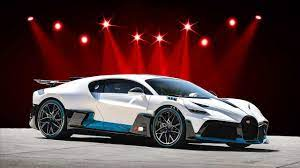

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=101.0.4951.54)
Stacktrace:
Backtrace:
	Ordinal0 [0x004E7413+2389011]
	Ordinal0 [0x00479F61+1941345]
	Ordinal0 [0x0036C520+836896]
	Ordinal0 [0x0039A1F3+1024499]
	Ordinal0 [0x0038FF93+982931]
	Ordinal0 [0x003B414C+1130828]
	Ordinal0 [0x0038F974+981364]
	Ordinal0 [0x003B4364+1131364]
	Ordinal0 [0x003C4302+1196802]
	Ordinal0 [0x003B3F66+1130342]
	Ordinal0 [0x0038E546+976198]
	Ordinal0 [0x0038F456+980054]
	GetHandleVerifier [0x00699632+1727522]
	GetHandleVerifier [0x0074BA4D+2457661]
	GetHandleVerifier [0x0057EB81+569713]
	GetHandleVerifier [0x0057DD76+566118]
	Ordinal0 [0x00480B2B+1968939]
	Ordinal0 [0x00485988+1989000]
	Ordinal0 [0x00485A75+1989237]
	Ordinal0 [0x0048ECB1+2026673]
	BaseThreadInitThunk [0x76506359+25]
	RtlGetAppContainerNamedObjectPath [0x77977B74+228]
	RtlGetAppContainerNamedObjectPath [0x77977B44+180]


In [162]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [163]:
img_urls

{'https://carsguide-res.cloudinary.com/image/upload/f_auto,fl_lossy,q_auto,t_cg_hero_large/v1/editorial/listicle/hero_image/2020-Bugatti%20Centodieci-1001x565-%282%29.jpg',
 'https://cdn.luxe.digital/media/2021/11/26104936/best-classic-cars-vintage-old-luxe-digital%402x.jpg',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-3MwDlCOEG1GrAbFYmre27Ch1kvR5nBt1Qw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-W8vd0FnvEqsjHlHNYUdUEUUtVS23J2zs0w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ3gqMhzYB0gbSThAhzEBl8Cb9yOGmwiHNuNw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4n7ChA4fHFqilLvxqsZgKiKNnHy0qA9ghFg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6LpD_F1U4zbFP--zzfqL5Gt9R68QZ8xrj_g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHv9g5rzyFcqrVod5trntRDbCIX5wuUxLVxA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQI04riPEjFNy4R1b0P1h6h8bqkoa-eUeAhQg&usqp=C

### 3.Machine Learning

In [164]:
#Open Driver
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
#open driver with url
driver.get('https://images.google.com/')

In [165]:
#input bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys(input("Enter Name:-"))
#search bar
click_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
click_bar.click()

Enter Name:-machine learning


In [166]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [167]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

Message: element click intercepted: Element  is not clickable at point (165, 90). Other element would receive the click: <a href="/search?q=machine+learning&amp;tbm=isch&amp;chips=q:machine+learning,g_1:artificial+intelligence:0qwqrBbRat4%3D&amp;bih=612&amp;biw=1366&amp;hl=en-US&amp;sa=X&amp;ved=2ahUKEwjuhfb5u_L3AhW1zqACHXrPBQ4Q4lYoAHoECAEQGw" data-navigation="server" jslog="11106" aria-label="artificial intelligence" class="ZZ7G7b A6Smgb">...</a>
  (Session info: chrome=101.0.4951.54)
Stacktrace:
Backtrace:
	Ordinal0 [0x004E7413+2389011]
	Ordinal0 [0x00479F61+1941345]
	Ordinal0 [0x0036C658+837208]
	Ordinal0 [0x0039F8AF+1046703]
	Ordinal0 [0x0039D8D6+1038550]
	Ordinal0 [0x0039B5EB+1029611]
	Ordinal0 [0x0039A359+1024857]
	Ordinal0 [0x0038FF93+982931]
	Ordinal0 [0x003B414C+1130828]
	Ordinal0 [0x0038F974+981364]
	Ordinal0 [0x003B4364+1131364]
	Ordinal0 [0x003C4302+1196802]
	Ordinal0 [0x003B3F66+1130342]
	Ordinal0 [0x0038E546+976198]
	Ordinal0 [0x0038F456+980054]
	GetHandleVerifier [0x0069
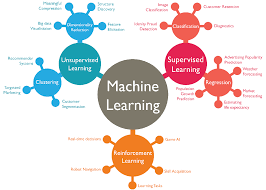
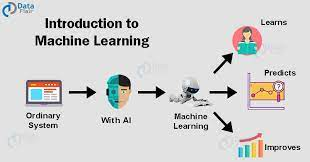

In [169]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [170]:
img_urls

{'https://assets.weforum.org/article/image/-1usr3g1ISvVdZZpEO-B7A0ROjmKD8nRNb5x_IwYlXQ.jpg',
 'https://bernardmarr.com/img/Are%20Machine%20Learning%20And%20AI%20The%20Same.jpg',
 'https://bernardmarr.com/wp-content/uploads/2021/08/Should-I-Choose-Machine-Learning-or-Big-Data.jpg',
 'https://bs-uploads.toptal.io/blackfish-uploads/components/blog_post_page/content/cover_image_file/cover_image/687073/retina_1708x683_cover-0323-MachineLearning_Dan_Newsletter-b21703f41d807514083e297955e1b46d.png',
 'https://builtin.com/sites/www.builtin.com/files/styles/og/public/2021-12/machine-learning-examples-applications.png',
 'https://cdn.britannica.com/40/216540-138-14385CFE/How-machine-learning-is-predicting-synthetic-products.jpg?w=800&h=450&c=crop',
 'https://cdn.educba.com/academy/wp-content/uploads/2019/12/Machine-Learning-Techniques.jpg',
 'https://cdn.searchenginejournal.com/wp-content/uploads/2020/09/how-machine-learning-is-changing-seo-how-to-adapt-5f60c25878dfc-1520x800.png',
 'https://cdn

In [178]:
driver.close()

### 4.Guitar

In [191]:
#Open Driver
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
#open driver with url
driver.get('https://images.google.com/')

In [194]:
#input bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys(input("Enter Name:-"))
#search bar
click_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
click_bar.click()

Enter Name:-Guitar


In [195]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [196]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

In [197]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [198]:
img_urls

{'https://39zsbo2fj4og6a79534grq31-wpengine.netdna-ssl.com/wp-content/uploads/Guitar-parts-electric-acoustic-1024x1020.png',
 'https://39zsbo2fj4og6a79534grq31-wpengine.netdna-ssl.com/wp-content/uploads/tabs-1024x686.jpg',
 'https://5.imimg.com/data5/SELLER/Default/2021/3/YI/CM/JE/15237173/professional-musical-linden-wood-jnr-600c-string-acoustic-home-imported-guitar-250x250.jpg',
 'https://acousticguitar.com/wp-content/uploads/2020/03/generic-guitar-indoors_resized-e1602545144526-1200x900.jpg',
 'https://ae01.alicdn.com/kf/Ha58bbcda1316463ca5327473e59f7717C.jpg_Q90.jpg_.webp',
 'https://assets.yousician.com/app/uploads/2021/02/15152144/learn-guitar-1-1000x1000.jpg',
 'https://blog.dundee.ac.uk/studentblog/files/2020/11/IMG_20170901_155041_856-1024x576.jpg',
 'https://breedlovemusic.com/wp-content/uploads/2021/06/breedlove-sideways-graphic-eco-collection3.png',
 'https://cdn.britannica.com/31/176331-050-AE5E4D77/guitar.jpg?w=300&h=169&c=crop',
 'https://cdn.britannica.com/70/72170-050-

In [199]:
driver.close()

### 5.Cakes

In [200]:
#Open Driver
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
#open driver with url
driver.get('https://images.google.com/')

In [201]:
#input bar
search_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
search_bar.send_keys(input("Enter Name:-"))
#search bar
click_bar=driver.find_element_by_xpath('/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
click_bar.click()

Enter Name:-cakes


In [202]:
#Scroll to the end of the page
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)#sleep_between_interactions

In [203]:
#Locate the images to be scraped from the current page 
imgResults = driver.find_elements_by_xpath("//img[contains(@class,'Q4LuWd')]")
totalResults=len(imgResults)

In [ ]:
#Click on each Image to extract its corresponding link to download

img_urls = set()
for i in  range(0,len(imgResults)):
    img=imgResults[i]
    try:
        img.click()
        time.sleep(2)
        actual_images = driver.find_elements_by_css_selector('img.n3VNCb')
        for actual_image in actual_images:
            if actual_image.get_attribute('src') and 'https' in actual_image.get_attribute('src'):
                img_urls.add(actual_image.get_attribute('src'))
    except ElementClickInterceptedException or ElementNotInteractableException as err:
        print(err)

In [205]:
img_urls

{'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-KiucKu1qU64rUL69QUBcd4nrE-RtGefX8w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-kjRQWVAQTX4MAVSZtcFEbTQ4EIyrTEPrQA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ05lRiDhRuQBRQD9TD8Yh1UbvTym49DQ-ntA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ50t1rEpobsQfUEM9XdIqlAFEV3TtrXs7iEg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBobr6vDxOBri6yrysCReOyR43q5JvijtfJA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUQ01voubewxn-LNxTC8czfkB6onJOup5WmQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXQaw18uiIWooOaQ4vjt44f0uFkK5TI_b9uA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQg6Z8t0GnlyxFmprU889cHER3nIP7kGTReGw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgS2PQ6TCy3Uh7BfdWbZI1aca52Up5uIvAoQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoyTfTxB

In [206]:
driver.close()

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [214]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")
url4="https://www.flipkart.com/search?q=smartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(url4)

In [215]:
Brand_Name=[]
Colour=[]
P_F_Camera=[]
Display_size_Resolution=[]
ProcessorAndCores=[]
Battery=[]
Price=[]
Product_URL=[]

In [216]:
#scraping the Brand_Name 
BName=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in BName:
    if i.text is None :
        Brand_Name.append("--") 
    else:
        Brand_Name.append(i.text)
print(len(Brand_Name),Brand_Name)

24 ['POCO C31 (Royal Blue, 64 GB)', 'realme C11 2021 (Cool Grey, 32 GB)', 'realme C11 2021 (Cool Blue, 64 GB)', 'realme C11 2021 (Cool Blue, 32 GB)', 'realme C31 (Dark Green, 32 GB)', 'realme C11 2021 (Cool Grey, 64 GB)', 'POCO C31 (Royal Blue, 32 GB)', 'realme C31 (Light Silver, 32 GB)', 'realme C31 (Dark Green, 64 GB)', 'realme C31 (Light Silver, 64 GB)', 'realme Narzo 50A (Oxygen Blue, 64 GB)', 'MOTOROLA G60 (Moonless, 128 GB)', 'realme 9 (Sunburst Gold, 128 GB)', 'realme Narzo 50A (Oxygen Green, 64 GB)', 'realme C35 (Glowing Black, 64 GB)', 'realme C35 (Glowing Black, 128 GB)', 'realme C35 (Glowing Green, 64 GB)', 'POCO C31 (Shadow Gray, 64 GB)', 'realme Narzo 50A (Oxygen Blue, 128 GB)', 'realme 9 (Stargaze White, 128 GB)', 'vivo T1 5G (Rainbow Fantasy, 128 GB)', 'vivo T1 5G (Starlight Black, 128 GB)', 'vivo T1 5G (Rainbow Fantasy, 128 GB)', 'vivo T1 5G (Starlight Black, 128 GB)']


In [217]:
#scraping the Storage_RAM_ROM 
ram=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 512 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '4 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6

In [226]:
Storage_RAM_ROM=[]
#scraping the Storage_RAM_ROM 
ram=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']//li[1]")
for i in ram:
    if i.text is None :
        Storage_RAM_ROM.append("--") 
    else:
        Storage_RAM_ROM.append(i.text)
print(len(Storage_RAM_ROM),Storage_RAM_ROM)

24 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '2 GB RAM | 32 GB ROM | Expandable Upto 256 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 512 GB', '3 GB RAM | 32 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM', '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '4 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM | Expandable Upto 256 GB', '6 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '6

In [219]:
#scraping the Display_size_Resolution 
DS=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']//li[2]")
for i in DS:
    if i.text is None :
        Display_size_Resolution.append("--") 
    else:
        Display_size_Resolution.append(i.text)
print(len(Display_size_Resolution),Display_size_Resolution)

24 ['16.59 cm (6.53 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.56 cm (6.52 inch) HD Display', '16.51 cm (6.5 inch) HD+ Display', '16.59 cm (6.53 inch) HD+ Display', '16.56 cm (6.52 inch) HD Display', '16.56 cm (6.52 inch) HD Display', '16.56 cm (6.52 inch) HD Display', '16.51 cm (6.5 inch) HD+ Display', '17.22 cm (6.78 inch) Full HD+ Display', '16.26 cm (6.4 inch) Full HD+ AMOLED Display', '16.51 cm (6.5 inch) HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.76 cm (6.6 inch) Full HD+ Display', '16.59 cm (6.53 inch) HD+ Display', '16.51 cm (6.5 inch) HD+ Display', '16.26 cm (6.4 inch) Full HD+ AMOLED Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display', '16.71 cm (6.58 inch) Full HD+ Display']


In [220]:
#scraping the ProcessorAndCores 
P=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']//li[5]")
for i in P:
    if i.text is None :
        ProcessorAndCores.append("--") 
    else:
        ProcessorAndCores.append(i.text)
print(len(ProcessorAndCores),ProcessorAndCores)

24 ['MediaTek Helio G35 Processor', 'Octa-core Processor', 'Octa-core Processor', 'Octa-core Processor', 'Unisoc T612 Processor', 'Octa-core Processor', 'MediaTek Helio G35 Processor', 'Unisoc T612 Processor', 'Unisoc T612 Processor', 'Unisoc T612 Processor', 'MediaTek Helio G85 Processor', 'Qualcomm Snapdragon 732G Processor', 'Qualcomm Snapdragon 680 Processor', 'MediaTek Helio G85 Processor', 'Unisoc Tiger T616 Processor', 'Unisoc Tiger T616 Processor', 'Unisoc Tiger T616 Processor', 'MediaTek Helio G35 Processor', 'MediaTek Helio G85 Processor', 'Qualcomm Snapdragon 680 Processor', 'Qualcomm Snapdragon 695 Processor', 'Qualcomm Snapdragon 695 Processor', 'Qualcomm Snapdragon 695 Processor', 'Qualcomm Snapdragon 695 Processor']


In [221]:
#scraping the Battery 
B=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']//li[4]")
for i in B:
    if i.text is None :
        Battery.append("--") 
    else:
        Battery.append(i.text)
print(len(Battery),Battery)

24 ['5000 mAh Lithium-ion Polymer Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Lithium-ion Polymer Battery', '5000 mAh Battery', '5000 mAh Battery', '5000 mAh Battery', '6000 mAh Battery', '6000 mAh Battery', '5000 mAh Lithium Ion Battery', '6000 mAh Battery', '5000 mAh Lithium Polymer Battery', '5000 mAh Lithium Polymer Battery', '5000 mAh Lithium Polymer Battery', '5000 mAh Lithium-ion Polymer Battery', '6000 mAh Battery', '5000 mAh Lithium Ion Battery', '5000 mAh Lithium Battery', '5000 mAh Lithium Battery', '5000 mAh Lithium Battery', '5000 mAh Lithium Battery']


In [222]:
#scraping the Price 
price=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in price:
    if i.text is None :
        Price.append("--") 
    else:
        Price.append(i.text)
print(len(Price),Price)

24 ['₹9,499', '₹7,499', '₹8,999', '₹7,499', '₹9,299', '₹8,999', '₹8,499', '₹9,299', '₹9,999', '₹9,999', '₹11,649', '₹15,999', '₹17,999', '₹11,649', '₹11,999', '₹12,999', '₹11,999', '₹9,499', '₹12,609', '₹17,999', '₹16,990', '₹16,990', '₹15,990', '₹15,990']


In [229]:
FlipKart=pd.DataFrame([])
FlipKart['Brand_Name']=Brand_Name
FlipKart['Storage_RAM_ROM']=Storage_RAM_ROM
FlipKart['Display_size_Resolution']=Display_size_Resolution
FlipKart['ProcessorAndCores']=ProcessorAndCores
FlipKart['Battery']=Battery
FlipKart['Price']=Price

In [230]:
FlipKart.head()

,Brand_Name,Storage_RAM_ROM,Display_size_Resolution,ProcessorAndCores,Battery,Price
0,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,MediaTek Helio G35 Processor,5000 mAh Lithium-ion Polymer Battery,"₹9,499"
1,"realme C11 2021 (Cool Grey, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,Octa-core Processor,5000 mAh Battery,"₹7,499"
2,"realme C11 2021 (Cool Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,Octa-core Processor,5000 mAh Battery,"₹8,999"
3,"realme C11 2021 (Cool Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,Octa-core Processor,5000 mAh Battery,"₹7,499"
4,"realme C31 (Dark Green, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD Display,Unisoc T612 Processor,5000 mAh Battery,"₹9,299"


In [231]:
FlipKart.shape

(24, 6)

In [232]:
FlipKart.to_csv('mobiles.csv')

In [233]:
driver.close()

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [239]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [240]:
# opening google maps
driver.get("https://www.google.co.in/maps")
time.sleep(3)

city = input('Enter City Name : ')                                         # Enter city to be searched
search = driver.find_element_by_id("searchboxinput")                       # locating search bar
search.clear()                                                             # clearing search bar
time.sleep(2)
search.send_keys(city)                                                     # entering values in search bar
button = driver.find_element_by_id("searchbox-searchbutton")               # locating search button
button.click()                                                             # clicking search button
time.sleep(3)

try:
    url_string = driver.current_url
    print("URL Extracted: ", url_string)
    lat_lng = re.findall(r'@(.*)data',url_string)
    if len(lat_lng):
        lat_lng_list = lat_lng[0].split(",")
        if len(lat_lng_list)>=2:
            lat = lat_lng_list[0]
            lng = lat_lng_list[1]
        print("Latitude = {}, Longitude = {}".format(lat, lng))

except Exception as e:
        print("Error: ", str(e))

Enter City Name : Guntur
URL Extracted:  https://www.google.co.in/maps/@17.8760325,79.522751,7z
Error:  name 're' is not defined


In [241]:
driver.close()

### 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in. 

In [242]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [243]:
url1="https://trak.in/india-startup-funding-investment-2015/"

In [244]:
driver.get(url1)

In [245]:
Dates=[]
Company=[]
Industry=[]
Investor_Name=[]
Investment_Type=[]
Amount=[]

In [246]:
#scraping the company_name 
companies=driver.find_elements_by_xpath("//td[@class='column-3']")
for i in companies:
    if i.text is None :
        Company.append("--") 
    else:
        Company.append(i.text)
print(len(Company),Company)

392 ['BYJU’S', 'Meesho', 'Swiggy', 'Groww', 'Beldara', 'DealShare', 'Uniphore', 'Dunzo', 'BYJU’S', 'SkilloVilla', 'CityMall', 'DotPe', 'Doubtnut', 'Zomato', 'Fingerlix', 'Zolve', 'KreditBee', 'Pepperfry', 'Grofers', 'Nothing', 'SplashLearn', 'Digit Insurance', 'Bombay Shaving Company', 'DeHaat', 'Darwinbox', 'mfine', 'Udayy', 'True Elements', 'Saveo', 'Bira 91', 'Pine Labs', 'Zenoti', 'Tax Buddy India', 'Delhivery', 'PagarBook', 'Codingal', 'CRED', 'Bira 91', 'Chumbak', 'Cityflo', 'Shipsy', 'Unacademy', 'Cashfree', 'Credgenics', 'Country Delight', 'Nykaa', 'Betterplace', 'FlexiLoans', 'GetVantage', 'FreshToHome', 'Origo', 'Origo', 'Treebo Hotels', 'Hubilo', 'CredAble', 'Byju’s', 'mCaffeine', 'Qshala', 'Winzo', 'Hippo Video', 'Melorra', '1mg', 'mfine', 'Apna', 'Railofy', 'Practo', 'Medlife', 'HungerBox', 'Dunzo', 'Terra.do', 'Classplus', 'Niyo', 'ZestMoney', 'FreshToHome', 'Eduvanz', 'Flipkart', 'Vedantu', 'Crio', 'goDutch', 'Mystifly', 'JetSynthesys', 'gigIndia', 'PumPumPum', 'FLYX', '

In [247]:
#scraping the Industry 
Ind=driver.find_elements_by_xpath("//td[@class='column-4']")
for i in Ind:
    if i.text is None :
        Industry.append("--") 
    else:
        Industry.append(i.text)
print(len(Industry),Industry)

392 ['Edu-tech', 'E-commerce', 'Online Food Delivery', 'FinTech', 'E-commerce', 'E-commerce', 'Technology', 'E-commerce', 'Edu-tech', 'Edu-tech', 'E-commerce', 'FinTech', 'Edu Tech', 'Hospitality', 'Hospitality', 'FinTech', 'Finance', 'E-commerce', 'E-Commerce', 'Technology', 'EdTech', 'Financial Services', 'Consumer Goods Company', 'AgriTech Startup', 'SaaS', 'Health Tech Startup', 'EdTech', 'Food Startup', 'B2B E-commerce', 'Food and Beverage', 'Financial Services', 'Technology Provider', 'FinTech', 'Supply chain', 'SaaS', 'EduTech', 'Financial Services', 'Food and Beverage', 'Lifestyle', 'Transportation', 'SaaS', 'Edutech', 'FinTech', 'Fintech', 'Dairy Tech', 'E-commerce', 'Digital Solutions', 'FinTech', 'FinTech', 'E-commerce', 'AgriTech', 'Advertising', 'Hospitality', 'Information Technology', 'FinTech', 'EduTech', 'Personal Care', 'EduTech', 'Online Gaming', 'Video Customer Experience(CX) Platform', 'E-commerce', 'E-commerce', 'HealthTech', 'Human Resources', 'Transportation', 'H

In [248]:
#scraping the Dates 
dt=driver.find_elements_by_xpath("//td[@class='column-2']")
for i in dt:
    if i.text is None :
        Dates.append("--") 
    else:
        Dates.append(i.text)
print(len(Dates),Dates)

392 ['01/04/2021', '05/04/2021', '14/04/2021', '07/04/2021', '14/04/2021', '04/03/2021', '31/03/2021', '30/03/2021', '30/03/2021', '23/03/2021', '25/03/2021', '26/03/2021', '11/02/2021', '22/02/2021', '19/02/2021', '17/02/2021', '15/02/2021', '12/02/2021', '12/02/2021', '09/02/2021', '09/02/2021', '15/01/2021', '28/01/2021', '19/01/2021', '19/01/2021', '18/01/2021', '18/01/2021', '11/01/2021', '13/01/2021', '15/12/2020', '21/12/2020', '15/12/2020', '22/12/2020', '15/12/2020', '18/12/2020', '30/11/2020', '30/11/2020', '29/11/2020', '27/11/2020', '25/11/2020', '25/11/2020', '25/11/2020', '24/11/2020', '30/11/2020', '23/11/2020', '28/10/2020', '28/10/2020', '28/10/2020', '27/10/2020', '27/10/2020', '27/10/2020', '27/10/2020', '15/10/2020', '26/10/2020', '28/10/2020', '08/09/2020', '12/09/2020', '09/09/2020', '02/09/2020', '09/09/2020', '07/09/2020', '07/09/2020', '31/08/2020', '31/08/2020', '03/09/2020', '15/08/2020', '13/08/2020', '13/08/2020', '04/08/2020', '11/08/2020', '12/08/2020', '

In [249]:
#scraping the Investor_Name 
IN=driver.find_elements_by_xpath("//td[@class='column-7']")
for i in IN:
    if i.text is None :
        Investor_Name.append("--") 
    else:
        Investor_Name.append(i.text)
print(len(Investor_Name),Investor_Name)

392 ['Innoven Capital', 'SoftBank Vision Fund 2', 'Amansa Holdings, Carmignac, Falcon Edge Capital, Goldman Sachs, Think Investments', 'MC Global Edtech, B Capital, Baron, others', 'Hindustan Media Ventures', 'Innoven Capital', 'Sorenson Capital Partners', 'Krishtal Advisors Pte Ltd', 'MC Global Edtech, B Capital, Baron, others', 'Titan Capital, others', 'Accel Partners', 'PayU', 'SIG Global, Sequoia Capital, WaterBridge Ventures and ON Mauritius', 'Tiger Global, Kora', 'Rhodium Trust, Accel Partners and Swiggy', 'Accel Partners and Lightspeed Venture Partners', 'Azim Premji’s PremjiInvest and South Korea’s Mirae Asset Venture', 'InnoVen Capital', 'SoftBank Vision Fund (SVF)', 'GV', 'Owl Ventures', 'A91 Partners, Faering Capital, TVS Capital Funds', 'Reckitt Benckiser', 'Prosus Ventures', 'Salesforce Ventures', 'Heritas Capital Management', 'Sequoia Capital', 'SIDBI Venture Capital', 'Matrix Partners India, RTP Global, others', 'Nishant Mittal, Pankaj Chaddah and Shikha Sunil Chandak',

In [250]:
#scraping the Investment_Type 
IT=driver.find_elements_by_xpath("//td[@class='column-8']")
for i in IT:
    if i.text is None :
        Investment_Type.append("--") 
    else:
        Investment_Type.append(i.text)
print(len(Investment_Type),Investment_Type)

392 ['Series F', 'Series E', 'Series J', 'Series D', 'Venture', 'Debt Financing', 'Series D', 'Series E', 'Series F', 'Seed', 'Series A', 'Series A', 'Series B', 'Venture', 'Series C', 'Seed', 'Series C', 'Debt Financing', 'Unspecified', 'Series A', 'Series C', 'Venture', 'Venture', 'Series C', 'Seed', 'Venture Round', 'Seed Funding', 'Series', 'Seed', 'Funding', 'Secondary Market', 'Series D', 'Seed', 'Secondary Market', 'Series A', 'Seed', 'Series C', 'Bridge Funding', 'Pre-series E', 'Series A', 'Series A', 'Venture', 'Series B', 'Pre-Series A', 'Series C', 'Personal Investment', 'Series B', 'Equity and Debt', 'Seed', 'Series C', 'Debt', 'Series A', '', 'Seed', 'Follow-On', 'Private Equity', 'Series B', 'Angel', 'Series B', 'Series A', 'Debt Financing', 'In Progress', 'Series B', 'Series A', 'Seed', 'Series F', '', 'Series D1', 'In Progress', 'Seed', 'In Progress', '', '', 'Venture', 'Series A', 'M&A', 'Series D', 'pre-Series A', 'Seed', 'pre-Series B', 'Venture-Series Unknown', 'pr

In [251]:
#scraping the Amount 
Price=driver.find_elements_by_xpath("//td[@class='column-9']")
for i in Price:
    if i.text is None :
        Amount.append("--") 
    else:
        Amount.append(i.text)
print(len(Amount),Amount)

392 ['460,000,000', '300,000,000', '343,000,000', '83,000,000', '7,400,000', '250,000,000', '140,000,000', '8,000,000', '460,000,000', '300,000,000', '11,000,000', '27,500,000', '2,500,000', '250,000,000', '2,747,045.20', '1,50,00,000', '75,000,000', '4,773,958', '55,000,000', '15,000,000', '18,000,000', '1,80,00,000', '6,172,258.50', '30,000,000', '15,000,000', '16,000,000', '15,000,000', '100,000,000', '4,000,000', '1,273,634.07', 'Undisclosed', '160,000,000', '1,000,000', '25,000,000', '15,000,000', '560,000', '80,000,000', '3,000,000', '1,001,047.92', '7,700,000', '6,003,806', '75,000,000-100,000,000', '35,300,000', '3,500,000', '25,000,000', 'NA', '10,000,000', '20,160,000', '5,000,000', '121,000,000', '4,700,000', '15,000,000', '6,000,000', '4,500,000', '4,500,000', '500,000,000', '3,000,000', '370,000', '15,500,000', '4,500,000', 'upto 8,900,000', '100,000,000', '5,400,000', '8,000,000', '950,000', '32,000,000', '23,000,000', '1,560,000', '30,000,000', '1,400,000', 'upto 15,000,

In [252]:
Funding=pd.DataFrame()
Funding['Company']=Company
Funding['Industry']=Industry
Funding['Investor_Name']=Investor_Name
Funding['Amount Invested']=Amount
Funding['Specification']=Investment_Type
Funding['Dates']=Dates

In [253]:
Funding

,Company,Industry,Investor_Name,Amount Invested,Specification,Dates
0,BYJU’S,Edu-tech,Innoven Capital,"460,000,000",Series F,01/04/2021
1,Meesho,E-commerce,SoftBank Vision Fund 2,"300,000,000",Series E,05/04/2021
2,Swiggy,Online Food Delivery,"Amansa Holdings, Carmignac, Falcon Edge Capita...","343,000,000",Series J,14/04/2021
3,Groww,FinTech,"MC Global Edtech, B Capital, Baron, others","83,000,000",Series D,07/04/2021
4,Beldara,E-commerce,Hindustan Media Ventures,"7,400,000",Venture,14/04/2021
...,...,...,...,...,...,...
387,zippserv,Consumer Internet,Info Edge (India) Ltd,"440,000",Seed/ Angel Funding,09/07/2018
388,Groww,Consumer Internet,"Insignia Ventures Partners, Lightbridge Partne...","1,100,000",Seed/ Angel Funding,09/07/2018
389,Avenue Growth,Consumer Internet,"Avtar Monga, chief operating office at IDFC Ba...","437,000",Seed/ Angel Funding,10/07/2018
390,iNICU,Healthcare,Venture Catalysts,N/A,Seed/ Angel Funding,10/07/2018


In [254]:
Funding.to_csv('funding.csv')

In [255]:
driver.close()

### 7. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [256]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [257]:
url="https://www.digit.in/top-products/best-gaming-laptops-40.html"

In [258]:
driver.get(url)

In [259]:
Brands=[]
Products_Description=[]
Specification=[]

In [260]:
brand=driver.find_elements_by_xpath("//div[@class='TopNumbeHeading active sticky-footer']")
for i in brand:
    Brands.append(str(i.text).replace("\n",""))
Brands

['1.MSI RAIDER GE76',
 '2.ASUS ROG STRIX SCAR 15',
 '3.ACER NITRO 5',
 '4.MSI STEALTH 15M',
 '5.ASUS ROG STRIX SCAR 15',
 '6.ASUS ROG STRIX SCAR 15',
 '7.ASUS ZEPHYRUS G14',
 '8.HP OMEN 16',
 '9.ASUS ROG ZEPHYRUS DUO 15',
 '10.ACER ASPIRE 7 GAMING LAPTOP']

In [261]:
specification_tag=driver.find_elements_by_xpath("//div[@class='Specs-Wrap']")
for i in specification_tag:
    Specification.append(str(i.text).replace("\n",""))
Specification

['OSWINDOWS 11 HOMEDISPLAY17" (3840 X 2160)PROCESSOR12TH GEN INTEL CORE I9-12900HK | 5 GHZMEMORY2 TB SSD/16 GBGB DDR5',
 'OSWINDOWS 11 HOMEDISPLAY15.6" (2560 X 1440)PROCESSOR12TH GEN INTEL CORE I9-12900H | 2.5 GHZMEMORY2 TB SSD/32 GBGB DDR5',
 'OSWINDOWS 10DISPLAY15.6" (1920 X 1080)PROCESSORAMD RYZEN 9 OCTA CORE | 2.4 GHZMEMORY1 TB HDD/16 GBGB DDR4',
 'OSWINDOWS 10DISPLAY15.6" (1920 X 1080)PROCESSORINTEL CORE I7 11TH GEN - 11375H | NAMEMORY1 TB SSD/16 GBGB DDR4',
 'OSWINDOWS 10DISPLAY15.6" (2560 X 1440)PROCESSORAMD RYZEN 9 OCTA CORE - 5900HX | 3.3 GHZMEMORY2 TB SSD/32 GBGB DDR4',
 'OSWINDOWS 10 HOMEDISPLAY15.6" (1920 X 1080)PROCESSORAMD RYZEN™ 9 5900HX | 3.3 GHZMEMORY1 TB SSD/16 GBGB DDR4',
 'OSWINDOWS 10 HOMEDISPLAY14" (1920 X 1080)PROCESSORAMD 3RD GEN RYZEN 9 | 3.3 GHZMEMORY1 TB SSD/16 GBGB DDR4',
 'OSWINDOWS 11 HOMEDISPLAY16.1" (1920 X 1080)PROCESSOR12TH GEN INTEL CORE I7-12700H | 4.7 GHZMEMORY1 TB SSD/16 GBGB DDR4',
 'OSWINDOWS 10DISPLAY15.6" (3840 X 1100)PROCESSORINTEL CORE I7 10T

In [262]:
description=driver.find_elements_by_xpath("//div[@class='Section-center']")
for i in description:
    Products_Description.append(str(i.text).replace("\n",""))
Products_Description

['Possibly the most high-end gaming laptop anyone can buy is the MSI Raider GTE76 2022 edition. Last year’s model was impressive that it won the Digit Zero 1 award for the best gaming laptop bar none. The current year model is no different either. It comes with an Intel 12th Gen Core i9-12900HK chip, which is a 14-core, 20-thread CPU. It is probably the most powerful processor in a laptop at the time of writing this article. It is paired with an equally capable Nvidia GeForce RTX 3080 Ti with 16GB GDDR6 VRAM featuring 175W TGP. The laptop also features 32GB DDR5 memory running in Quad-channel mode. To top it all off, the MSI Raider GE76 also comes equipped with a 2TB NVMe PCIe Gen 4 SSD to load all your files and games in an instant. If you have the budget, then the MSI Raider GE76 stands top of the list of the best gaming laptops and it’ll do so probably for a while now.SPECIFICATIONOS : Windows 11 HomeDisplay : 17" (3840 x 2160)Processor : 12th Gen Intel Core i9-12900HK | 5 GHzMemory

In [265]:
Price=[]
price_tag=driver.find_elements_by_xpath("//td[@class='smprice']")
for i in price_tag:
    Price.append(str(i.text).replace("\n","").replace('₹ ',''))
Price

['429,940',
 '285,390',
 '129,990',
 '134,990',
 '193,990',
 '215,990',
 '144,990',
 '139,990',
 '185,000',
 '53,490']

In [266]:
laptop=pd.DataFrame()
laptop['Brands']=Brands[0:10]
laptop['Price']=Price[0:10]
laptop['Specification']=Specification[0:10]
laptop['Description']=Products_Description[0:10]

In [267]:
laptop

,Brands,Price,Specification,Description
0,1.MSI RAIDER GE76,"429,940","OSWINDOWS 11 HOMEDISPLAY17"" (3840 X 2160)PROCE...",Possibly the most high-end gaming laptop anyon...
1,2.ASUS ROG STRIX SCAR 15,"285,390","OSWINDOWS 11 HOMEDISPLAY15.6"" (2560 X 1440)PRO...",The second high-end gaming laptop on the list ...
2,3.ACER NITRO 5,"129,990","OSWINDOWS 10DISPLAY15.6"" (1920 X 1080)PROCESSO...",Possibly the best value-for-money gaming lapto...
3,4.MSI STEALTH 15M,"134,990","OSWINDOWS 10DISPLAY15.6"" (1920 X 1080)PROCESSO...",If you’re looking for a powerful gaming laptop...
4,5.ASUS ROG STRIX SCAR 15,"193,990","OSWINDOWS 10DISPLAY15.6"" (2560 X 1440)PROCESSO...",If you want possibly the best performance poss...
5,6.ASUS ROG STRIX SCAR 15,"215,990","OSWINDOWS 10 HOMEDISPLAY15.6"" (1920 X 1080)PRO...",When the ASUS ROG Strix Scar 15 ended up on ou...
6,7.ASUS ZEPHYRUS G14,"144,990","OSWINDOWS 10 HOMEDISPLAY14"" (1920 X 1080)PROCE...",The Asus Zephyrus G14 is a first-of-its-kind g...
7,8.HP OMEN 16,"139,990","OSWINDOWS 11 HOMEDISPLAY16.1"" (1920 X 1080)PRO...",It is difficult to find a laptop that offers a...
8,9.ASUS ROG ZEPHYRUS DUO 15,"185,000","OSWINDOWS 10DISPLAY15.6"" (3840 X 1100)PROCESSO...",The machine is powered by an Intel Core i7-108...
9,10.ACER ASPIRE 7 GAMING LAPTOP,"53,490","OSWINDOWS 10 HOMEDISPLAY15.6"" (1920 X 1080)PRO...",The Acer Aspire 7 gaming laptop is a very capa...


In [268]:
laptop.to_csv('laptop.csv')

In [269]:
driver.close()

### 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [273]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [274]:
url='https://www.forbes.com/billionaires/'

In [275]:
driver.get(url)

In [277]:
Name=[]
Rank=[]
Net_worth=[]
Citizenship=[]

In [280]:
name_tag=driver.find_elements_by_xpath('//div[@class="personName"]/div[1]')
for x in name_tag:
    Name.append(x.text)

In [281]:
print(len(Name),Name)

200 ['Elon Musk', 'Jeff Bezos', 'Bernard Arnault & family', 'Bill Gates', 'Warren Buffett', 'Larry Page', 'Sergey Brin', 'Larry Ellison', 'Steve Ballmer', 'Mukesh Ambani', 'Gautam Adani & family', 'Michael Bloomberg', 'Carlos Slim Helu & family', 'Francoise Bettencourt Meyers & family', 'Mark Zuckerberg', 'Jim Walton', 'Zhong Shanshan', 'Alice Walton', 'Rob Walton', 'Changpeng Zhao', 'Charles Koch', 'Julia Koch & family', 'Amancio Ortega', 'Michael Dell', 'Zhang Yiming', 'David Thomson & family', 'Phil Knight & family', 'Dieter Schwarz', 'Robin Zeng', 'MacKenzie Scott', 'Rodolphe Saadé & family', 'François Pinault & family', 'Klaus-Michael Kuehne', 'Ma Huateng', 'Beate Heister & Karl Albrecht Jr. & family', 'Giovanni Ferrero', 'Li Ka-shing', 'Stephen Schwarzman', 'Lee Shau Kee', 'Len Blavatnik', 'Jacqueline Mars', 'John Mars', 'Alain Wertheimer', 'Gerard Wertheimer', 'German Larrea Mota Velasco & family', 'Gina Rinehart', 'Shiv Nadar', 'Jim Simons', 'He Xiangjian', 'Miriam Adelson', 'D

In [285]:
rank_tag=driver.find_elements_by_xpath('//div[@class="rank"]')
for x in rank_tag:
    Rank.append(x.text.replace('.',''))
print(len(Rank),Rank)

200 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '19', '21', '21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '37', '39', '40', '41', '41', '43', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '56', '56', '59', '60', '61', '62', '63', '64', '65', '66', '67', '67', '69', '70', '71', '71', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '85', '87', '88', '89', '90', '91', '91', '91', '94', '94', '96', '97', '98', '99', '100', '100', '102', '103', '104', '104', '106', '106', '106', '106', '110', '111', '112', '113', '114', '115', '116', '117', '117', '119', '119', '121', '121', '123', '123', '125', '126', '127', '128', '129', '130', '130', '132', '133', '134', '135', '135', '137', '138', '138', '138', '138', '142', '142', '144', '144', '146', '146', '146', '149', '150', '151', '152', '152', '154', '154', '156', '156', '158

In [288]:
net=driver.find_elements_by_xpath('//div[@class="netWorth"]/div[1]')
for x in net:
    Net_worth.append(x.text.replace('B',' Billion Dollers').replace('$',''))
print(len(Net_worth),Net_worth)

200 ['219  Billion Dollers', '171  Billion Dollers', '158  Billion Dollers', '129  Billion Dollers', '118  Billion Dollers', '111  Billion Dollers', '107  Billion Dollers', '106  Billion Dollers', '91.4  Billion Dollers', '90.7  Billion Dollers', '90  Billion Dollers', '82  Billion Dollers', '81.2  Billion Dollers', '74.8  Billion Dollers', '67.3  Billion Dollers', '66.2  Billion Dollers', '65.7  Billion Dollers', '65.3  Billion Dollers', '65  Billion Dollers', '65  Billion Dollers', '60  Billion Dollers', '60  Billion Dollers', '59.6  Billion Dollers', '55.1  Billion Dollers', '50  Billion Dollers', '49.2  Billion Dollers', '47.3  Billion Dollers', '47.1  Billion Dollers', '44.8  Billion Dollers', '43.6  Billion Dollers', '41.4  Billion Dollers', '40.4  Billion Dollers', '37.3  Billion Dollers', '37.2  Billion Dollers', '36.8  Billion Dollers', '36.2  Billion Dollers', '34.8  Billion Dollers', '34.8  Billion Dollers', '32.6  Billion Dollers', '32.5  Billion Dollers', '31.7  Billion Do

In [289]:
citizenship=driver.find_elements_by_xpath('//div[@class="countryOfCitizenship"]')
for x in citizenship:
    Citizenship.append(x.text)
print(len(Citizenship),Citizenship)

200 ['United States', 'United States', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'Mexico', 'France', 'United States', 'United States', 'China', 'United States', 'United States', 'Canada', 'United States', 'United States', 'Spain', 'United States', 'China', 'Canada', 'United States', 'Germany', 'Hong Kong', 'United States', 'France', 'France', 'Germany', 'China', 'Germany', 'Italy', 'Hong Kong', 'United States', 'Hong Kong', 'United States', 'United States', 'United States', 'France', 'France', 'Mexico', 'Australia', 'India', 'United States', 'China', 'United States', 'Austria', 'Italy', 'United States', 'Japan', 'China', 'Germany', 'India', 'China', 'China', 'United States', 'Japan', 'China', 'France', 'Indonesia', 'United States', 'Switzerland', 'Chile', 'China', 'Indonesia', 'United States', 'United States', 'United States', 'United States', 'Japan', 'United States', 'United State

In [304]:
Source=[]
source=driver.find_elements_by_xpath('//div[@class="expand-row__icon-container"]/span[1]')
for x in source:
    Source.append(x.text)
print(len(Source),Source)

200 ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Walmart', 'beverages, pharmaceuticals', 'Walmart', 'Walmart', 'cryptocurrency exchange', 'Koch Industries', 'Koch Industries', 'Zara', 'Dell computers', 'TikTok', 'media', 'Nike', 'retail', 'batteries', 'Amazon', 'shipping', 'luxury goods', 'shipping', 'internet media', 'supermarkets', 'Nutella, chocolates', 'diversified', 'investments', 'real estate', 'music, chemicals', 'candy, pet food', 'candy, pet food', 'Chanel', 'Chanel', 'mining', 'mining', 'software services', 'hedge funds', 'home appliances', 'casinos', 'Red Bull', 'eyeglasses', 'hedge funds', 'fashion retail', 'online games', 'BMW, pharmaceuticals', 'vaccines', 'package delivery', 'pig breeding', 'cryptocurrency exchange', 'sensors', 'automobiles', 'cheese', 'banking, tobacco', 'Estee Lauder', 'fintech', 'mining', 'e-commerce', 'banking, tobacco', 'Google', 'hedge funds', 'Quicken Loans', 'hospitals', 'internet, telecom', 'money management', 'newspapers, TV ne

In [301]:
billionaires=pd.DataFrame()
billionaires['Rank']=Rank
billionaires['Name']=Name
billionaires['Net Worth']=Net_worth
billionaires['Citizenship/Country']=Citizenship
billionaires['Source']=Source

In [302]:
billionaires

,Rank,Name,Net Worth,Citizenship/Country,Source
0,1,Elon Musk,219 Billion Dollers,United States,
1,2,Jeff Bezos,171 Billion Dollers,United States,
2,3,Bernard Arnault & family,158 Billion Dollers,France,
3,4,Bill Gates,129 Billion Dollers,United States,
4,5,Warren Buffett,118 Billion Dollers,United States,
...,...,...,...,...,...
195,192,Marcel Herrmann Telles,10.3 Billion Dollers,Brazil,beer
196,197,Leon Black,10 Billion Dollers,United States,private equity
197,197,Joe Gebbia,10 Billion Dollers,United States,Airbnb
198,197,David Geffen,10 Billion Dollers,United States,"movies, record labels"


In [305]:
billionaires.to_csv('Billionaires.csv')

In [306]:
driver.close()

### 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video. 

In [307]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [308]:
url='https://www.youtube.com/watch?v=geWjooaLm1I'

In [309]:
driver.get(url)

In [316]:
comments=[]
comment=driver.find_elements_by_xpath('//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for x in comment:
    comments.append(x.text)
print(len(comments),comments)

40 ['', 'We want arjun and parvathi again to start their journeys in saregamapa', '', "True talent should come without any bias  and don't let any one come for trps. it is about talent .", '', 'Arjun is soo good he must come back', '', 'Arun Vijay and Vinod Sharma are the two most deserving candidates than the rest.', '', 'Charan tej and Arjun Vijay ️', '', 'True talent should come ', '', 'Frankly to say parvathi is not able to sing that good. We should appreciate her hard work. But competition is only seen as a competition', '', 'Arjun Vijay he is fantastic singer', '', 'We want Parvati again to start journey ', '', 'I voted for keerthana..hope she gets reentry into the show.', '', 'PLZZZZ We want Rasool to Rock again', '', 'Parvathi deserves the re-entry again', '', 'We want Parvathi journey again', '', 'Parvathi we want to see back your performance All the best', '', 'Arjun Vijay ', '', 'పార్వతి గారు మళ్లీ రావడం చాలా సంతోషంగా ఆనందంగా ఉంది', '', 'Wow...Parvathi is back.....So happy f

In [317]:
upvote=[]
vote=driver.find_elements_by_xpath('//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for x in vote:
    upvote.append(x.text)
print(len(upvote),upvote)

40 ['', '344', '', '79', '', '204', '', '81', '', '65', '', '13', '', '96', '', '16', '', '7', '', '24', '', '10', '', '65', '', '18', '', '38', '', '40', '', '101', '', '55', '', '16', '', '325', '', '12']


In [329]:
time=[]
tm=driver.find_elements_by_xpath('//yt-formatted-string[@class="published-time-text above-comment style-scope ytd-comment-renderer"]/a[1]')
for x in tm:
    time.append(x.text)
print(len(time),time)

20 ['11 hours ago', '11 hours ago', '11 hours ago', '11 hours ago', '11 hours ago', '10 hours ago', '9 hours ago', '11 hours ago', '7 hours ago', '11 hours ago (edited)', '11 hours ago', '10 hours ago', '11 hours ago', '10 hours ago', '11 hours ago', '11 hours ago', '11 hours ago', '11 hours ago', '11 hours ago', '11 hours ago']


In [330]:
for i in range(0,40):
    if i%2==0:
        time.insert(i,'-')
    else:
        continue

In [331]:
print(len(time),time)

40 ['-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '10 hours ago', '-', '9 hours ago', '-', '11 hours ago', '-', '7 hours ago', '-', '11 hours ago (edited)', '-', '11 hours ago', '-', '10 hours ago', '-', '11 hours ago', '-', '10 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago', '-', '11 hours ago']


In [332]:
df=pd.DataFrame()
df['Comments']=comments
df['Up Vote']=upvote
df['Time of Comments']=time
df

,Comments,Up Vote,Time of Comments
0,,,-
1,We want arjun and parvathi again to start thei...,344,11 hours ago
2,,,-
3,True talent should come without any bias and ...,79,11 hours ago
4,,,-
5,Arjun is soo good he must come back,204,11 hours ago
6,,,-
7,Arun Vijay and Vinod Sharma are the two most d...,81,11 hours ago
8,,,-
9,Charan tej and Arjun Vijay ️,65,11 hours ago


In [333]:
for i in range(0,39):
    if i%2==0:
        df.drop(i,axis=0,inplace=True)
    else:
        continue

In [334]:
df

,Comments,Up Vote,Time of Comments
1,We want arjun and parvathi again to start thei...,344,11 hours ago
3,True talent should come without any bias and ...,79,11 hours ago
5,Arjun is soo good he must come back,204,11 hours ago
7,Arun Vijay and Vinod Sharma are the two most d...,81,11 hours ago
9,Charan tej and Arjun Vijay ️,65,11 hours ago
11,True talent should come,13,10 hours ago
13,Frankly to say parvathi is not able to sing th...,96,9 hours ago
15,Arjun Vijay he is fantastic singer,16,11 hours ago
17,We want Parvati again to start journey,7,7 hours ago
19,I voted for keerthana..hope she gets reentry i...,24,11 hours ago (edited)


In [335]:
#save Dataframe
df.to_csv('comments.csv')

In [336]:
driver.close()

### 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description. 

In [337]:
driver = webdriver.Chrome(r"C:\Users\dell\Downloads\chromedriver_win32\chromedriver.exe")

In [338]:
url='https://www.hostelworld.com/s?q=London,%20England&city=London&country=England&type=city&id=3&from=2022-05-24&to=2022-05-27&guests=2&page=1'

In [339]:
driver.get(url)

In [340]:
hotel_name=[]
name=driver.find_elements_by_xpath('//h2[@class="title title-6"]/a[1]')
for x in name:
    hotel_name.append(x.text)
print(len(hotel_name),hotel_name)

30 ["St Christopher's Village", 'Selina Camden', 'Palmers Lodge - Swiss Cottage', 'Generator London', 'Urbany Hostel London', 'Astor Hyde Park', 'Safestay London Elephant & Castle', 'Smart Camden Inn Hostel', 'Smart Russell Square Hostel', 'No.8 Seven Sisters', 'London Backpackers', 'Barmy Badger Backpackers', 'Safestay London Kensington Holland Park', 'Prime Backpackers Angel', 'Phoenix Hostel', 'Smart Hyde Park View Hostel', "Wombat's City Hostel London", 'Queen Elizabeth Chelsea', 'Smart Hyde Park Inn Hostel', 'NX London Hostel', 'Hostel One Notting Hill', "St Christopher's Hammersmith", 'Strand Continental', "St Christopher's Camden", 'London Waterloo Hostel', 'Clink261', "St Christopher's Greenwich", 'PubLove @ The Steam Engine, Waterloo', "St Christopher's Shepherds Bush", 'The Dictionary Hostel']


In [341]:
distance=[]
dis=driver.find_elements_by_xpath('//span[@class="description"]')
for x in dis:
    distance.append(x.text)
print(len(distance),distance)

30 ['Hostel - 1.8km from city centre', 'Hostel - 5.5km from city centre', 'Hostel - 6.5km from city centre', 'Hostel - 3km from city centre', 'Hostel - 5.4km from city centre', 'Hostel - 4.3km from city centre', 'Hostel - 1.7km from city centre', 'Hostel - 4.4km from city centre', 'Hostel - 2.6km from city centre', 'Hostel - 9km from city centre', 'Hostel - 11.9km from city centre', 'Hostel - 5.5km from city centre', 'Hostel - 5.9km from city centre', 'Hostel - 3.6km from city centre', 'Hostel - 4.2km from city centre', 'Hostel - 5km from city centre', 'Hostel - 3.6km from city centre', 'Hostel - 5.7km from city centre', 'Hostel - 5km from city centre', 'Hostel - 6.1km from city centre', 'Hostel - 5.5km from city centre', 'Hostel - 7.5km from city centre', 'Hostel - 1.3km from city centre', 'Hostel - 4.3km from city centre', 'Hostel - 0.7km from city centre', 'Hostel - 3.2km from city centre', 'Hostel - 7.6km from city centre', 'Hostel - 0.5km from city centre', 'Hostel - 7km from city

In [342]:
ratings=[]
rate=driver.find_elements_by_xpath('//div[@class="score orange big"]')
for x in rate:
    ratings.append(x.text)
print(len(ratings),ratings)

30 ['8.1', '9.3', '9.0', '7.7', '9.4', '8.5', '7.4', '8.5', '6.8', '6.7', '8.3', '9.2', '7.1', '8.7', '7.8', '7.8', '9.0', '7.0', '6.5', '7.1', '8.5', '7.8', '7.1', '7.7', '6.7', '7.5', '7.4', '8.0', '7.5', '7.2']


In [343]:
reviews=[]
review=driver.find_elements_by_xpath('//div[@class="reviews"]')
for x in review:
    reviews.append(x.text)
print(len(reviews),reviews)

30 ['11196 Total Reviews', '24 Total Reviews', '15338 Total Reviews', '6936 Total Reviews', '305 Total Reviews', '11484 Total Reviews', '4234 Total Reviews', '2830 Total Reviews', '9641 Total Reviews', '3756 Total Reviews', '4238 Total Reviews', '1735 Total Reviews', '1191 Total Reviews', '572 Total Reviews', '3555 Total Reviews', '4549 Total Reviews', '13592 Total Reviews', '3261 Total Reviews', '6296 Total Reviews', '1123 Total Reviews', '1353 Total Reviews', '4017 Total Reviews', '839 Total Reviews', '3763 Total Reviews', '2494 Total Reviews', '77 Total Reviews', '3186 Total Reviews', '265 Total Reviews', '665 Total Reviews', '46 Total Reviews']


In [347]:
df=pd.DataFrame()
df['Hostel_Name']=hotel_name
df['distance from city centre']=distance
df['Ratings']=ratings
df['Reviews']=reviews

In [348]:
df

,Hostel_Name,distance from city centre,Ratings,Reviews
0,St Christopher's Village,Hostel - 1.8km from city centre,8.1,11196 Total Reviews
1,Selina Camden,Hostel - 5.5km from city centre,9.3,24 Total Reviews
2,Palmers Lodge - Swiss Cottage,Hostel - 6.5km from city centre,9.0,15338 Total Reviews
3,Generator London,Hostel - 3km from city centre,7.7,6936 Total Reviews
4,Urbany Hostel London,Hostel - 5.4km from city centre,9.4,305 Total Reviews
5,Astor Hyde Park,Hostel - 4.3km from city centre,8.5,11484 Total Reviews
6,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.4,4234 Total Reviews
7,Smart Camden Inn Hostel,Hostel - 4.4km from city centre,8.5,2830 Total Reviews
8,Smart Russell Square Hostel,Hostel - 2.6km from city centre,6.8,9641 Total Reviews
9,No.8 Seven Sisters,Hostel - 9km from city centre,6.7,3756 Total Reviews


In [349]:
df.to_csv('Hostels_in_London.csv')

In [350]:
driver.close()